## Using the Advertising.csv Dataset we evaluate various parameters

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.formula.api as sm

import matplotlib.pylab as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

### Loading the dataset

In [2]:
df = pd.read_csv("Datasets/Advertising.csv")

### Checking the datatype of each variable

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Evaluating various parameters

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [6]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
Radio         0.094175
Newspaper     0.894720
Sales         0.407571
dtype: float64

In [7]:
df.shape

(200, 5)

### Plotting heatmap to evaluate correlation between different variables

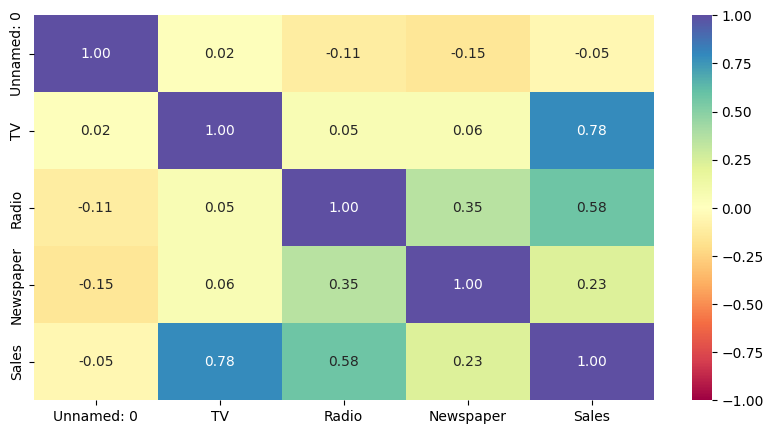

In [8]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    df.corr(),
    annot = True,
    vmin = -1,
    vmax = 1,
    fmt = ".2f",
    cmap = "Spectral"
)
plt.show()

### Using Sales variable as a target and others as predictors

In [9]:
X = df.drop(["Sales"], axis=1)
y = df["Sales"]

### Simple regression model without splitting the dataset

In [10]:
df_lr = LinearRegression()  # specifying the algorithm to use
df_lr.fit(X, y)  # Fitting the train data on the algorithm

LinearRegression()

In [11]:
print("intercept ", df_lr.intercept_)

intercept  3.005209420097845


### Actual vs Predicted Values

In [12]:
pred = df_lr.predict(X)  # generating the predicted values of sales

df_pred_test = pd.DataFrame(
    {"Actual": y, "Predicted": pred}
)  # saving the values to a data frame
df_pred_test.head(10)

,Actual,Predicted
0,22.1,20.572515
1,10.4,12.388463
2,9.3,12.351441
3,18.5,17.645433
4,12.9,13.240525
5,7.2,12.518669
6,11.8,11.783016
7,13.2,12.180724
8,4.8,3.788025
9,10.6,12.608878


### Evaluating model performance

In [13]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [14]:
# checking model performance on train set (whole dataset)
print("Training Performance\n")
df_lr_train_perf = model_performance_regression(df_lr, X, y)
df_lr_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.668244,1.252725,0.897251,0.895143,13.871096


In [15]:
# checking model performance on test set (whole dataset)
print("Test Performance\n")
df_lr_test_perf = model_performance_regression(df_lr, X, y)
df_lr_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.668244,1.252725,0.897251,0.895143,13.871096


### Now performing linear regression analysis using statsmodels module

In [16]:
import statsmodels.api as sm
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
x_train1 = sm.add_constant(X)
# Add constant to test data
x_test1 = sm.add_constant(X)

olsmodel = sm.OLS(y, x_train1).fit()
print(olsmodel.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     425.7
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           3.94e-95
Time:                        04:54:48   Log-Likelihood:                -386.14
No. Observations:                 200   AIC:                             782.3
Df Residuals:                     195   BIC:                             798.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0052      0.394      7.623      0.0

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [18]:
checking_vif(x_train1)

,feature,VIF
0,const,10.888470
1,Unnamed: 0,1.029228
2,TV,1.005467
3,Radio,1.149295
4,Newspaper,1.163551


In [19]:
# initial list of columns
cols = x_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train1[cols]

    # fitting the model
    model = sm.OLS(y, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'TV', 'Radio']


In [20]:
x_train2 = x_train1[selected_features]
x_test2 = x_test1[selected_features]

In [21]:
olsmod2 = sm.OLS(y, x_train2).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           4.83e-98
Time:                        04:54:48   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.0

In [22]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,22.1,20.555465,1.544535
1,10.4,12.345362,-1.945362
2,9.3,12.337018,-3.037018
3,18.5,17.617116,0.882884
4,12.9,13.223908,-0.323908
